In [1]:
import pandas as pd # To read csv
import re # Regex
import seaborn as sb # Statistical data visualization
import matplotlib.pyplot as plt

In [6]:
frame = pd.read_csv('E:/pokemon.csv') # Read csv into dataframe 
frame.head(1)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False


In [7]:
frame.columns = ['#','Name','Type1', 'Type2','Total' ,'HP', 'Attack','Defense','Sp.Atk','Sp.Def','Speed', 'Generation', 'Legendary']
frame = frame.set_index('#')

In [8]:
frame.head(10)

,Name,Type1,Type2,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


In [9]:
frame.tail(10)

,Name,Type1,Type2,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
714,Noibat,Flying,Dragon,245,40,30,35,45,40,55,6,False
715,Noivern,Flying,Dragon,535,85,70,80,97,80,123,6,False
716,Xerneas,Fairy,NaN,680,126,131,95,131,98,99,6,True
717,Yveltal,Dark,Flying,680,126,131,95,131,98,99,6,True
718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True
719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [10]:
frame.Name = frame.Name.apply(lambda x: re.sub(r'(.+)(Mega.+)',r'\2',x))
frame.Name = frame.Name.apply(lambda x: re.sub(r'(.+)(Primal.+)',r'\2',x))
frame.Name = frame.Name.apply(lambda x: re.sub(r'(HoopaHoopa)(.+)','Hoopa'+r'\2',x))

In [11]:
frame.head(10)

,Name,Type1,Type2,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
6,Mega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
6,Mega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


In [12]:
frame.tail(10)

,Name,Type1,Type2,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
714,Noibat,Flying,Dragon,245,40,30,35,45,40,55,6,False
715,Noivern,Flying,Dragon,535,85,70,80,97,80,123,6,False
716,Xerneas,Fairy,NaN,680,126,131,95,131,98,99,6,True
717,Yveltal,Dark,Flying,680,126,131,95,131,98,99,6,True
718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True
719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
719,Mega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
720,Hoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
720,Hoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [13]:
All = frame.loc[(frame['Name'].str.contains('Mega ')==False) & (frame['Name'].str.contains('Primal')==False)] # filter all pokemon without Mega and Primal in name.
All.head(10)

,Name,Type1,Type2,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False
8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False
9,Blastoise,Water,NaN,530,79,83,100,85,105,78,1,False


In [14]:
Poke = All.loc[(All['Legendary']==False)]
PokeL = All.loc[(All['Legendary']==True)]

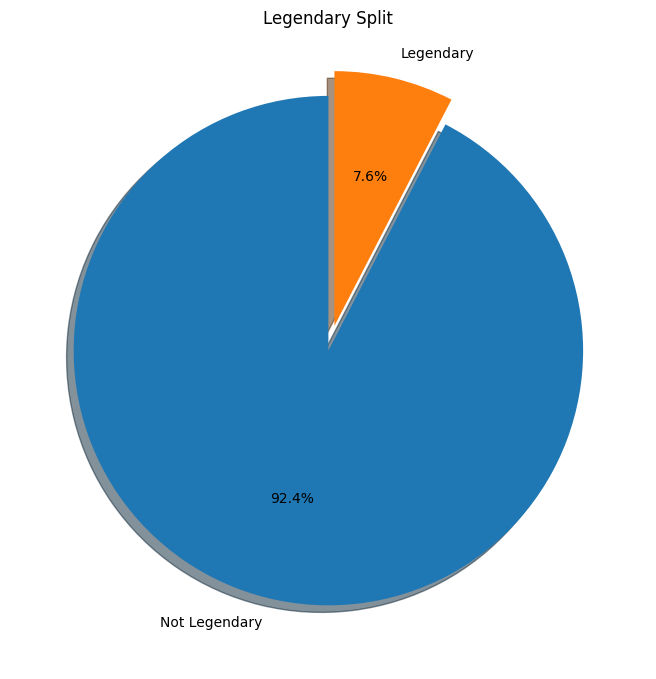

In [15]:
#Pie chart of legendary split
LSplit = [Poke['Name'].count(),PokeL['Name'].count()]
LegendPie = plt.pie(LSplit,labels= ['Not Legendary', 'Legendary'], autopct ='%1.1f%%', shadow = True, startangle = 90,explode=(0, 0.1))
plt.title('Legendary Split',fontsize = 12)
fig = plt.gcf()
fig.set_size_inches(11.7,8.27)
plt.savefig("LegendPie.png")

In [16]:
Gen1 = Poke.loc[Poke['Generation'] == 1]
Gen2 = Poke.loc[Poke['Generation'] == 2]
Gen3 = Poke.loc[Poke['Generation'] == 3]
Gen4 = Poke.loc[Poke['Generation'] == 4]
Gen5 = Poke.loc[Poke['Generation'] == 5]
Gen6 = Poke.loc[Poke['Generation'] == 6]

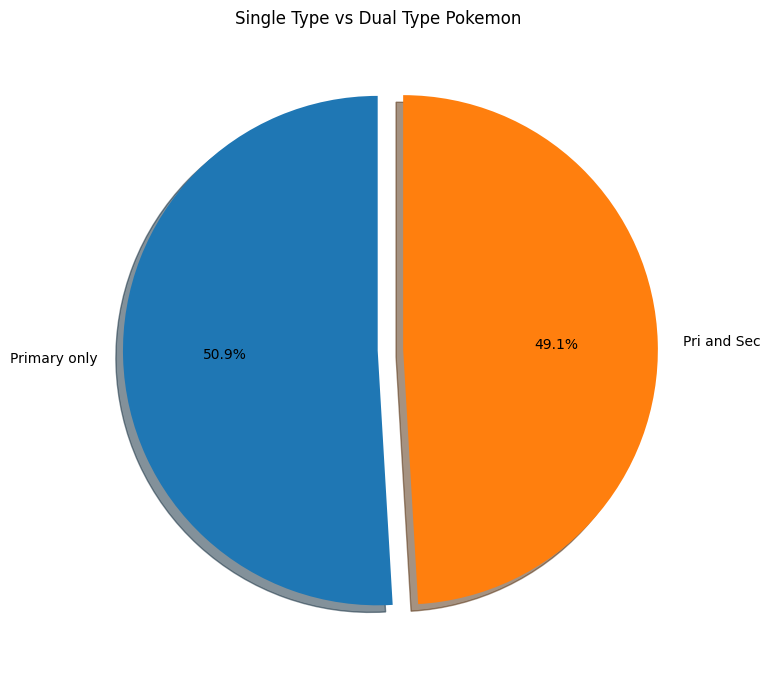

In [17]:
#Pie chart of type 1 vs type 2
TySplit = [Poke['Type1'].count() - Poke['Type2'].count(),Poke['Type2'].count()]
TypePie = plt.pie(TySplit,labels= ['Primary only', 'Pri and Sec'], autopct ='%1.1f%%', shadow = True, startangle = 90,explode=(0, 0.1))
plt.title('Single Type vs Dual Type Pokemon',fontsize = 12)
fig = plt.gcf()
fig.set_size_inches(11.7,8.27)
plt.savefig("TypePie.png")

In [18]:
type1_colours= ['#6890F0',  # Water
                    '#A8A878',  # Normal
                    '#A8B820',  # Bug
                    '#78C850',  # Grass
                    '#F08030',  # Fire
                    '#F85888',  # Psychic
                    '#F8D030',  # Electric
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#A040A0',  # Poison
                    '#E0C068',  # Ground
                    '#705848',  # Dark
                    '#C03028',  # Fighting
                    '#98D8D8',  # Ice
                    '#B8B8D0',  # Steel
                    '#7038F8',  # Dragon
                    '#EE99AC',  # Fairy
                    '#A890F0',  # Flying
                   ]

type2_colours= ['#78C850',  #None
                '#A890F0',  # Flying
                '#A040A0',  # Poison
                '#E0C068',  # Ground
                '#78C850',  # Grass
                '#F85888',  # Psychic
                '#B8B8D0',  # Steel
                '#C03028',  # Fighting
                '#EE99AC',  # Fairy
                '#705848',  # Dark
                '#B8A038',  # Rock
                '#6890F0',  # Water
                '#705898',  # Ghost
                '#7038F8',  # Dragon
                '#98D8D8',  # Ice
                '#F08030',  # Fire
                '#F8D030',  # Electric
                '#A8A878',  # Normal
                '#A8B820',  # Bug  
                ]

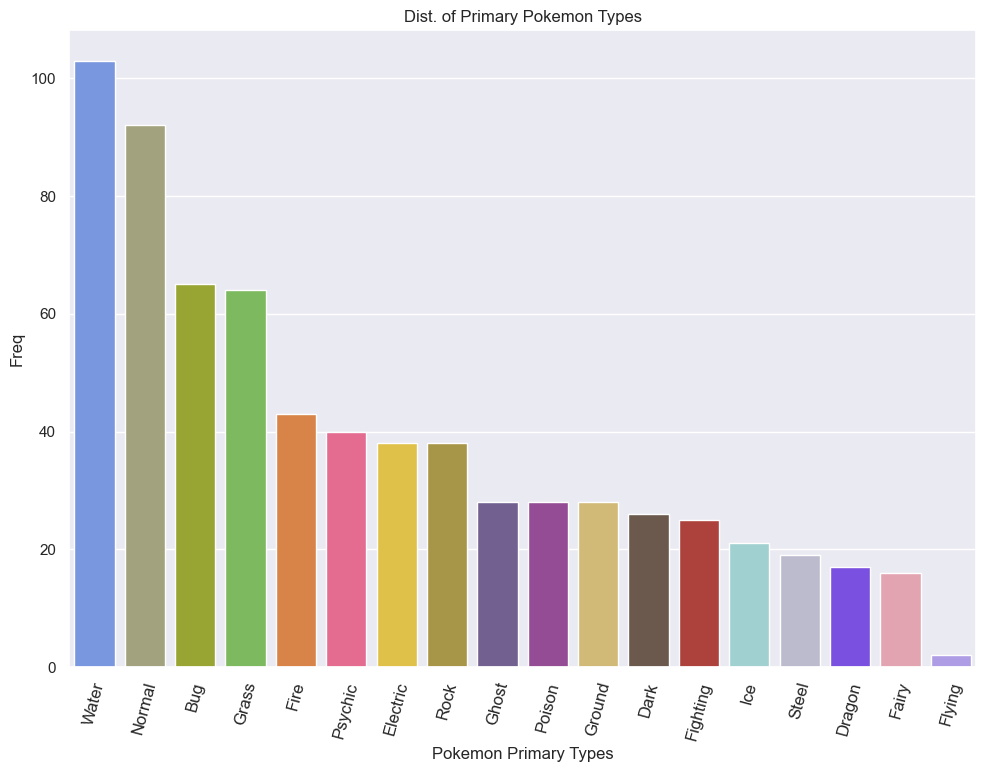

In [19]:
Type1 = pd.value_counts(Poke['Type1'])
sb.set()
dims = (11.7,8.27) #A4 dimensions
fig, ax = plt.subplots(figsize=dims)
BarT = sb.barplot(x=Type1.index,y=Type1,data=Poke, palette = type1_colours, ax=ax)
BarT.set_xticklabels(BarT.get_xticklabels(), rotation = 75, fontsize = 12)
BarT.set(xlabel ='Pokemon Primary Types', ylabel='Freq')
BarT.set_title('Dist. of Primary Pokemon Types')
FigBar = BarT.get_figure()
FigBar.savefig("BarPlot_PrimaryType.png")

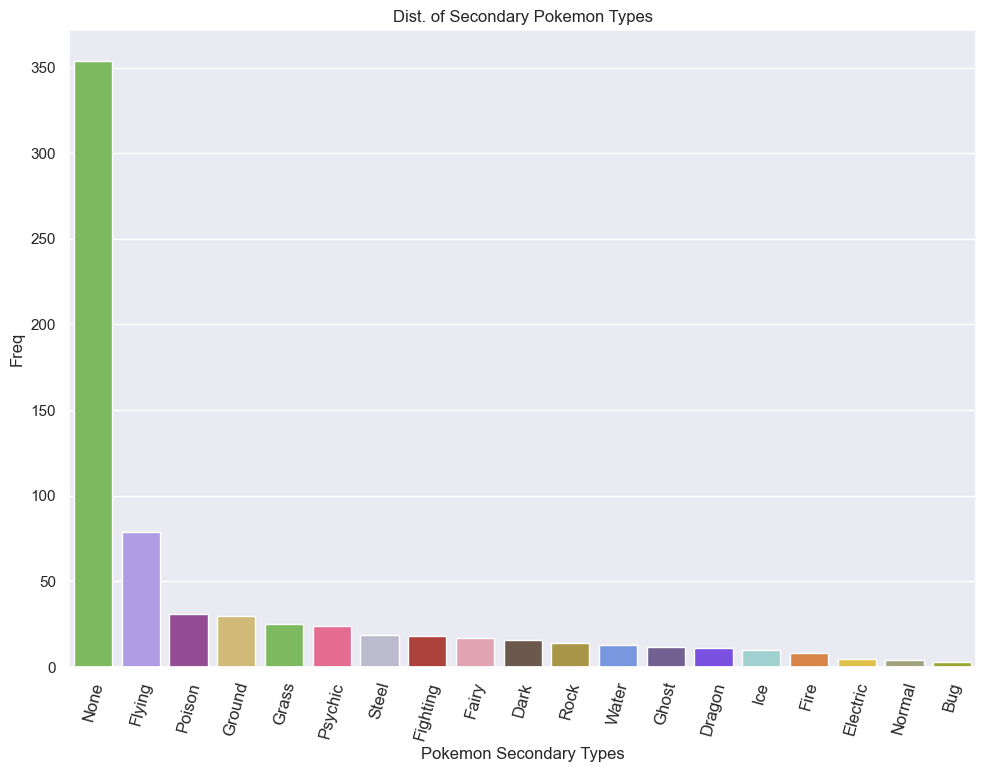

In [20]:
for row in Poke.loc[Poke.Type2.isnull(), 'Type2'].index:
    Poke.at[row, 'Type2'] = 'None'
    
Type2 = pd.value_counts(Poke['Type2'])
sb.set()
dims = (11.7,8.27) #A4 dimensions
fig, ax = plt.subplots(figsize=dims)
BarT = sb.barplot(x=Type2.index,y=Type2,data=Poke, palette = type2_colours, ax=ax)
BarT.set_xticklabels(BarT.get_xticklabels(), rotation = 75, fontsize = 12)
BarT.set(xlabel ='Pokemon Secondary Types', ylabel='Freq')
BarT.set_title('Dist. of Secondary Pokemon Types')
FigBar = BarT.get_figure()
FigBar.savefig("BarPlot_SecondaryType.png")

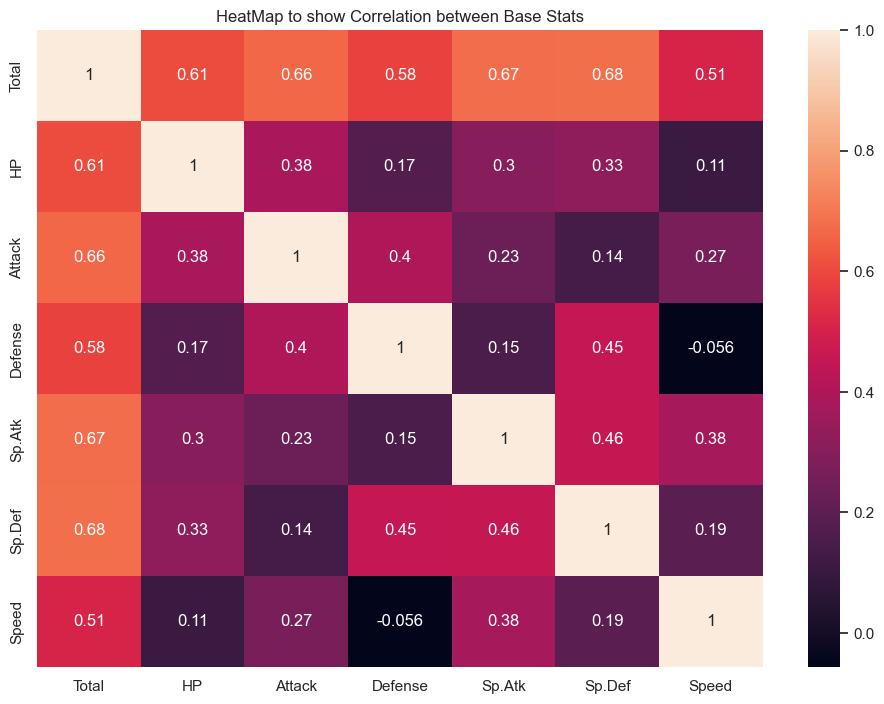

In [21]:
Corr = Poke[['Total' ,'HP', 'Attack','Defense','Sp.Atk','Sp.Def','Speed']]
sb.set()
dims = (11.7,8.27) #A4 dimensions
fig, ax = plt.subplots(figsize=dims)
CorrelationMap = sb.heatmap(Corr.corr(),annot = True, ax = ax)
CorrelationMap.set(title = 'HeatMap to show Correlation between Base Stats')
FigMap = CorrelationMap.get_figure()
FigMap.savefig("HeatMapCorr.png")

C:\Users\Nikhil I J\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


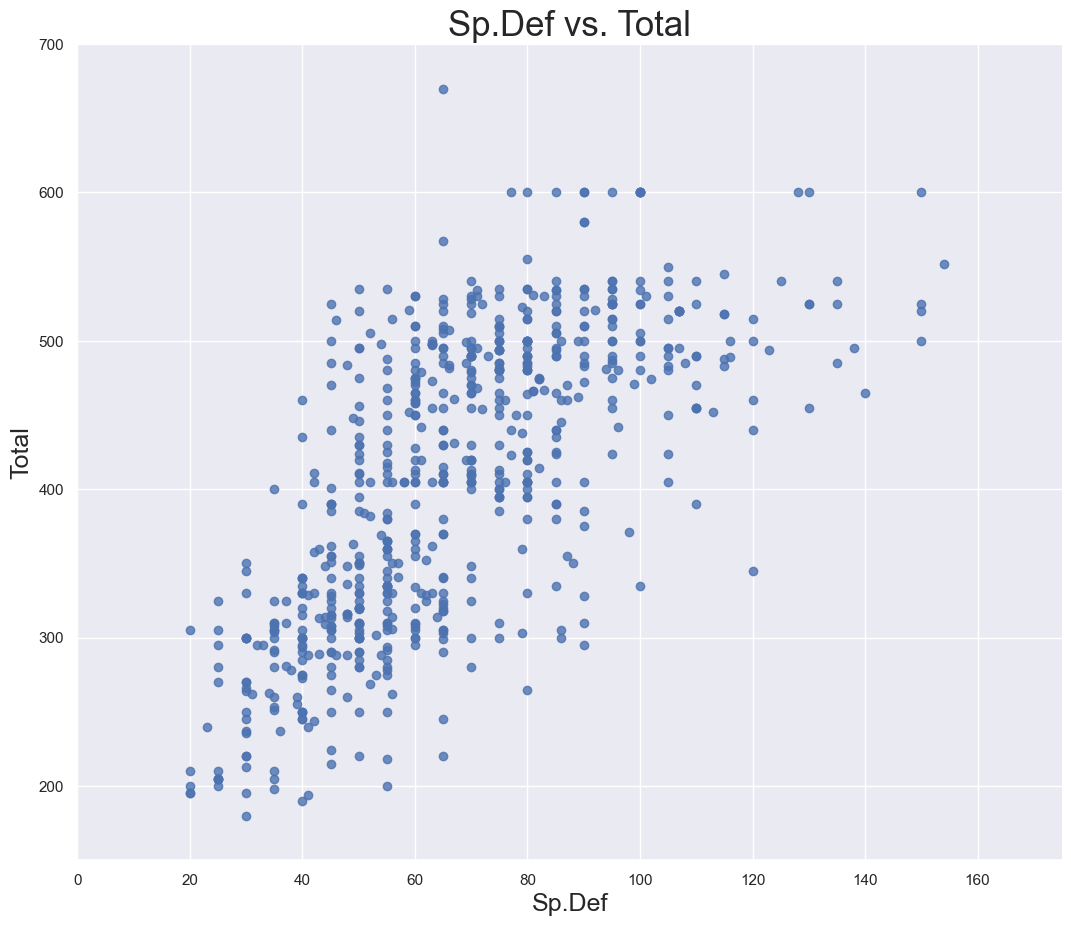

In [22]:
sb.set()
AttvTot = sb.lmplot(x='Sp.Def', y='Total',data=Poke,
                   fit_reg = False, size = 9, aspect = 1.2) #Can Add Hue to distinguish types
plt.ylim(150,700)
plt.xlim(0,175)
plt.title('Sp.Def vs. Total',fontsize = 25)
plt.xlabel('Sp.Def',fontsize = 18)
plt.ylabel('Total',fontsize = 18)
AttvTot.savefig("SP_SpDefvsTot.png")

C:\Users\Nikhil I J\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Nikhil I J\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


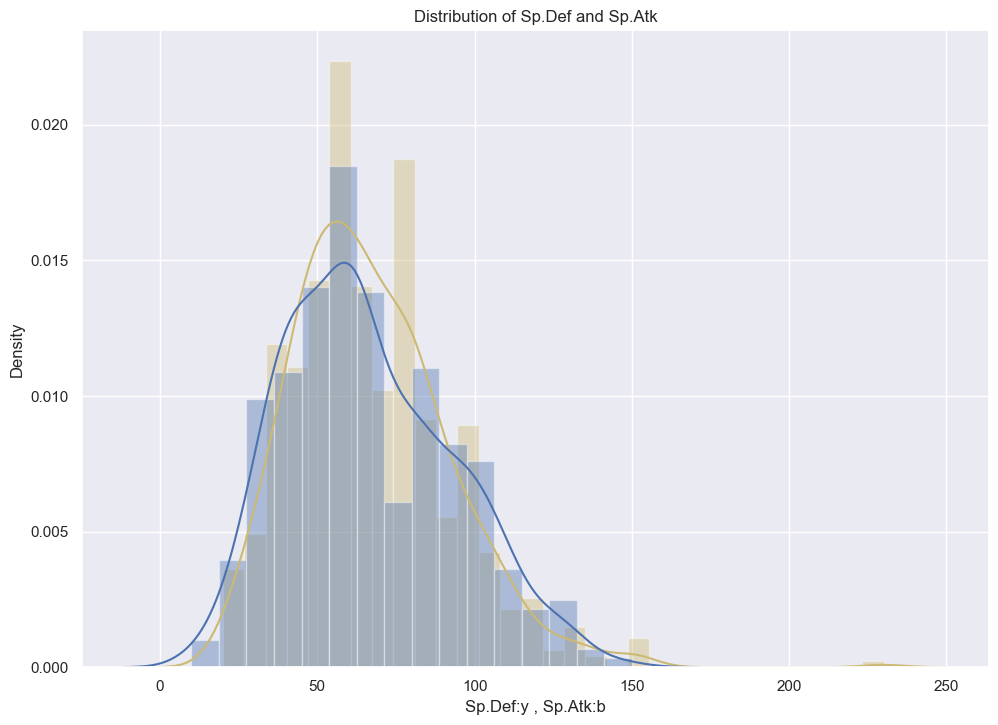

In [23]:
dims = (11.7,8.27) #A4 dimensions
fig, ax = plt.subplots(figsize=dims)
SpDhist = sb.distplot(Poke['Sp.Def'],color='y',hist=True,ax=ax)
SpAhist = sb.distplot(Poke['Sp.Atk'],color = 'b', hist = True,ax=ax)
SpAhist.set(title = 'Distribution of Sp.Def and Sp.Atk', xlabel = 'Sp.Def:y , Sp.Atk:b')
FigHist=SpAhist.get_figure()
FigHist.savefig("HistSpDvSpAt.png")

C:\Users\Nikhil I J\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Nikhil I J\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


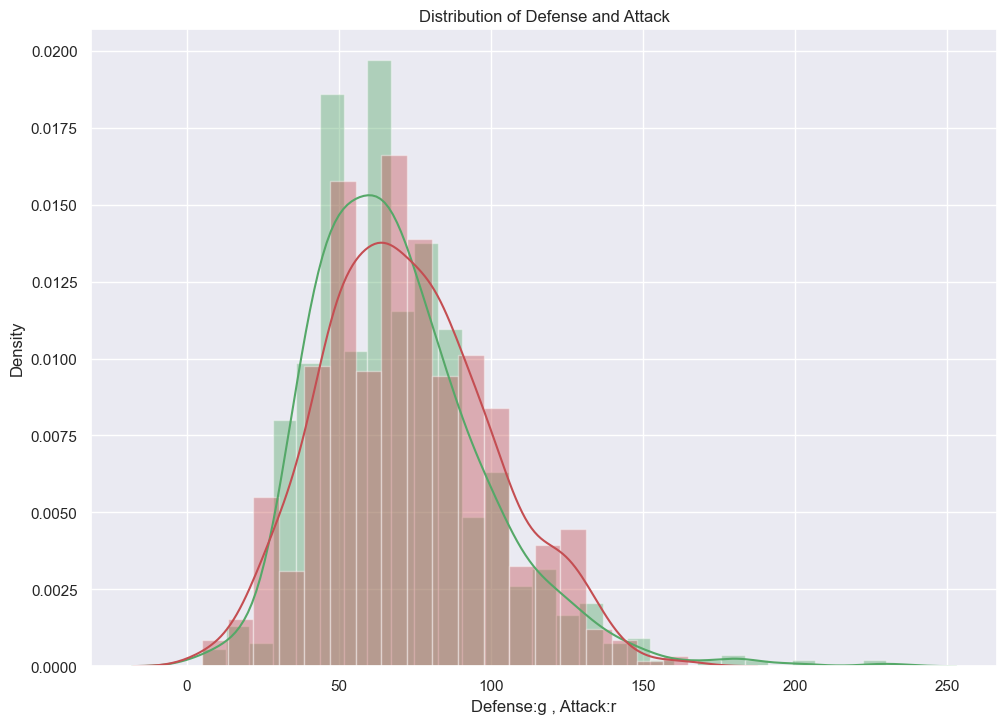

In [24]:
dims = (11.7,8.27) #A4 dimensions
fig, ax = plt.subplots(figsize=dims)
Defhist = sb.distplot(Poke['Defense'],color='g',hist=True,ax=ax)
Atthist = sb.distplot(Poke['Attack'],color = 'r', hist = True,ax=ax)
Atthist.set(title = 'Distribution of Defense and Attack', xlabel = 'Defense:g , Attack:r')
FigHist=Atthist.get_figure()
FigHist.savefig("HistDvAtt.png")

In [25]:
DS = Corr.describe() #Summary Statistics
print(DS)

            Total          HP      Attack     Defense      Sp.Atk      Sp.Def  \
count  693.000000  693.000000  693.000000  693.000000  693.000000  693.000000   
mean   406.132756   66.594517   72.825397   69.411255   66.174603   67.194805   
std     98.882015   25.184437   27.878345   28.445003   26.710011   25.107707   
min    180.000000    1.000000    5.000000    5.000000   10.000000   20.000000   
25%    318.000000   50.000000   52.000000   50.000000   45.000000   50.000000   
50%    413.000000   64.000000   70.000000   65.000000   61.000000   65.000000   
75%    490.000000   78.000000   90.000000   85.000000   85.000000   80.000000   
max    670.000000  255.000000  165.000000  230.000000  150.000000  230.000000   

            Speed  
count  693.000000  
mean    63.932179  
std     26.532503  
min      5.000000  
25%     45.000000  
50%     60.000000  
75%     84.000000  
max    160.000000  
